In [ ]:
import torch 
import torchvision 
import torchvision.transforms as transforms  

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog plane   cat  ship


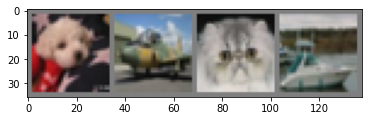

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
dataiter = iter(trainloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
import torch.nn as nn 
import torch.nn.functional as f
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.poo1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = self.poo1(f.relu(self.conv1(x)))
    x = self.poo1(f.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()


In [ ]:
import torch.optim as optim 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
for epoch in range(2):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels = data 
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d,%5d] loss: %.3f' % (epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print("finishes training")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1, 2000] loss: 2.168
[1, 4000] loss: 1.833
[1, 6000] loss: 1.661
[1, 8000] loss: 1.574
[1,10000] loss: 1.502
[1,12000] loss: 1.455
[2, 2000] loss: 1.379
[2, 4000] loss: 1.368
[2, 6000] loss: 1.341
[2, 8000] loss: 1.324
[2,10000] loss: 1.287
[2,12000] loss: 1.268
finishes training


In [ ]:
path = './cifar_net.pth'
torch.save(net.state_dict(),path)

Ground truth:   frog plane   dog   cat


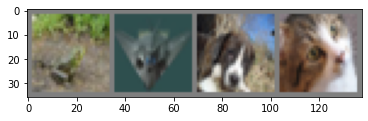

In [ ]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print("Ground truth: ",' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)
print("predcited : ", ' '.join("%5s" %classes[predicted[j]] for j in range(4)))

predcited :   frog  deer   dog   dog


In [ ]:
labels

tensor([6, 0, 5, 3])

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data 
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 54 %
